In [18]:
from DTC_cirq_V3 import *

In [19]:
from DTC_UTIL import MyNoiseModel

depolarizing_error_rate = 0.0
phase_damping_error_rate = 0.0
amplitude_damping_error_rate = 0.0
my_noise_model = MyNoiseModel(depolarizing_error_rate, phase_damping_error_rate, amplitude_damping_error_rate)

In [20]:
import cirq

sq = 4
N_QUBITS = sq**2
qreg_1D = cirq.LineQubit.range(N_QUBITS)
qreg_2D = cirq.GridQubit.square(sq)

(16, 51)


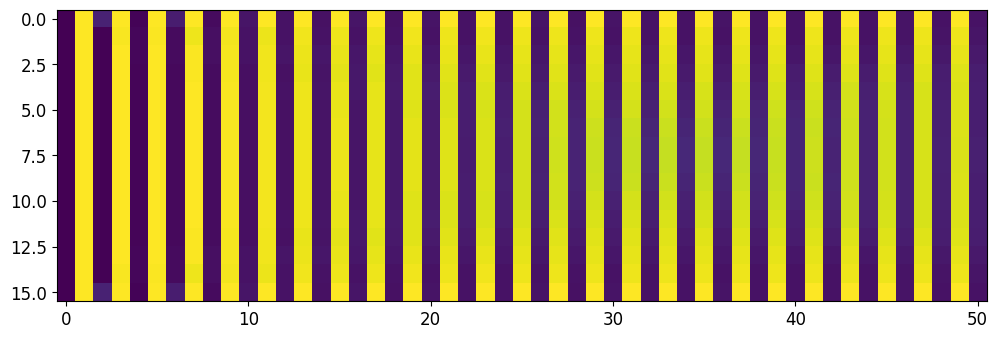

In [21]:
import numpy as np
floq_circuit = create_dtc_circuit(qreg_1D,
                                  cycles=50,
                                  g_value=0.9,
                                  theta=1*np.pi,
                                  phi=1*np.pi,
                                  alpha=1*np.pi,
                                  beta=1*np.pi,
                                  local_fields=1)

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})


(16, 51)


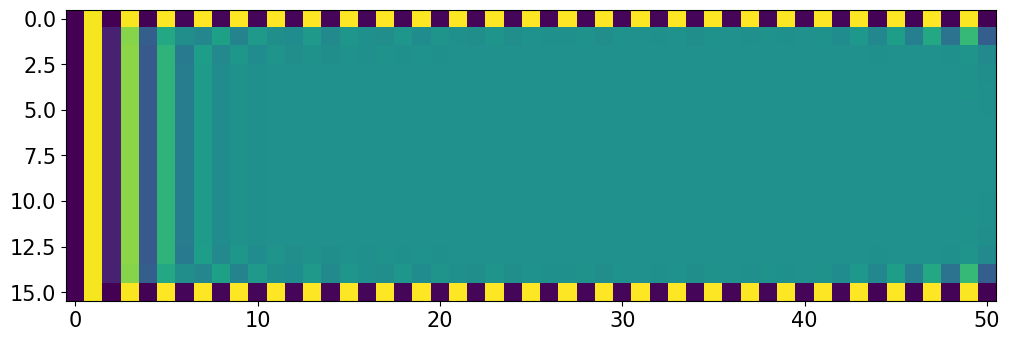

In [22]:
import numpy as np
floq_circuit = create_dtc_circuit(qreg_1D,
                                  cycles=50,
                                  g_value=0.9,
                                  theta=1*np.pi,
                                  phi=1*np.pi,
                                  alpha=1*np.pi,
                                  beta=1*np.pi,
                                  local_fields=0)

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})


(16, 51)


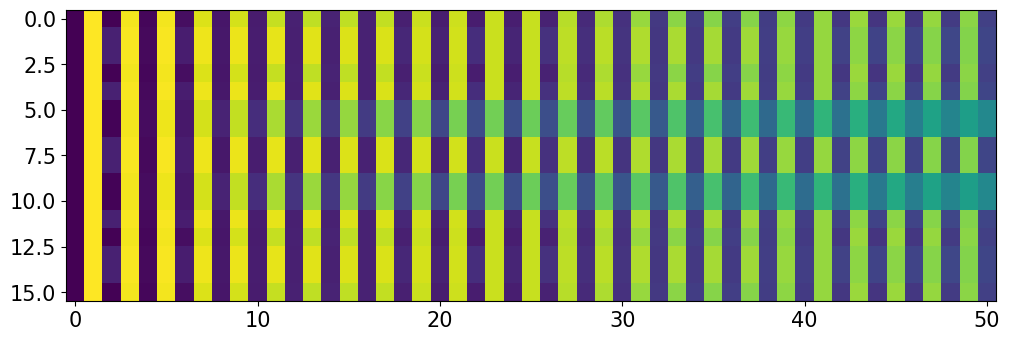

In [23]:

import numpy as np
floq_circuit = create_dtc_circuit(qreg_2D,
                                  cycles=50,
                                  g_value=0.9,
                                  theta=1*np.pi,
                                  phi=1*np.pi,
                                  alpha=1*np.pi,
                                  beta=1*np.pi,
                                  local_fields=1,
                                  dimensions=2)

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})


(16, 51)


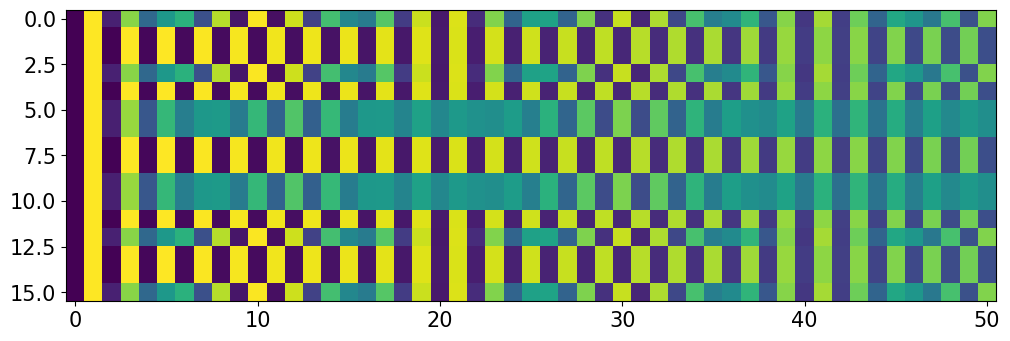

In [24]:
import numpy as np
floq_circuit = create_dtc_circuit(qreg_2D,
                                  cycles=50,
                                  g_value=0.9,
                                  theta=1*np.pi,
                                  phi=1*np.pi,
                                  alpha=1*np.pi,
                                  beta=1*np.pi,
                                  local_fields=0,
                                  dimensions=2)

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})


In [25]:

depolarizing_error_rate = 0.01
phase_damping_error_rate = 0.01
amplitude_damping_error_rate = 0.01
my_noise_model = MyNoiseModel(depolarizing_error_rate, phase_damping_error_rate, amplitude_damping_error_rate)

(16, 51)


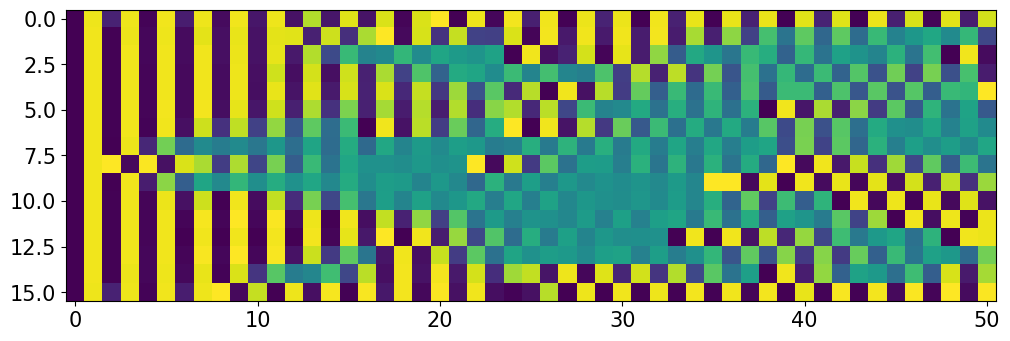

In [26]:

import numpy as np
floq_circuit = create_dtc_circuit(qreg_1D,
                                  cycles=50,
                                  g_value=0.9,
                                  theta=1*np.pi,
                                  phi=1*np.pi,
                                  alpha=1*np.pi,
                                  beta=1*np.pi,
                                  local_fields=1)

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})


(16, 51)


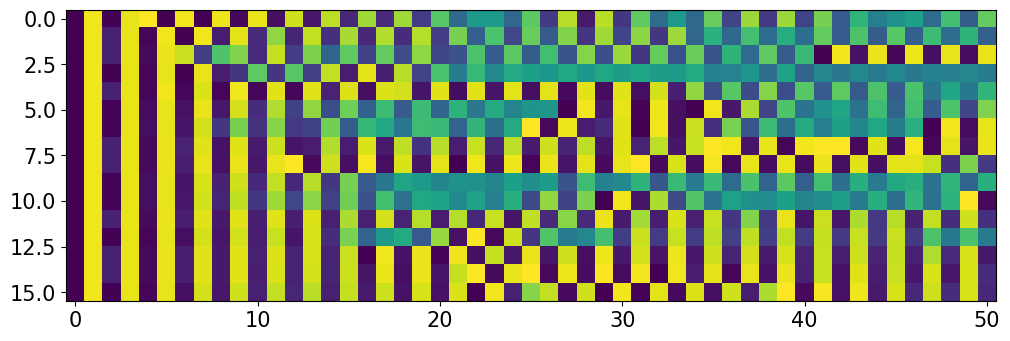

In [27]:
import numpy as np
floq_circuit = create_dtc_circuit(qreg_2D,
                                  cycles=50,
                                  g_value=0.9,
                                  theta=1*np.pi,
                                  phi=1*np.pi,
                                  alpha=1*np.pi,
                                  beta=1*np.pi,
                                  local_fields=1,
                                  dimensions=2)

result = simulate_dtc_circuit_list(floq_circuit,noise_md=my_noise_model)

dtc_z = np.transpose(get_polarizations(result, N_QUBITS))
print(dtc_z.shape)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1)
im = ax.imshow(dtc_z)
plt.rcParams.update({'font.size': 15})


(51,)


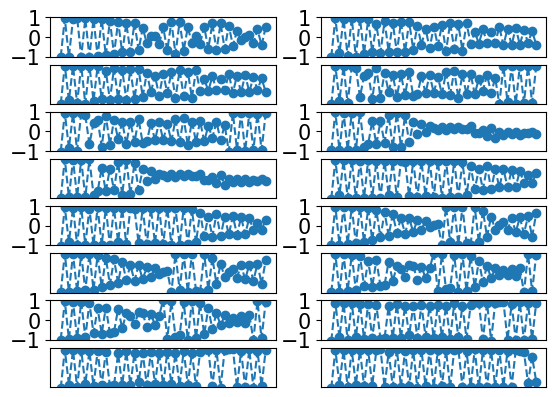

In [28]:
#Autocorrelation per Qubit

fig, ax = plt.subplots(int(N_QUBITS/2),2)
dtc_b = dtc_z - dtc_z.mean(axis=1, keepdims=True)
for ii in range(int(N_QUBITS/2)):
    for jj in range(2):
        ax[int(ii),int(jj)].plot(dtc_b[int(ii)+int(jj),:], linestyle = '--', marker = 'o')
        ax[int(ii),int(jj)].set_ylim([-1,1])
        ax[int(ii),int(jj)].set_ylim([-1,1])
        ax[int(ii),int(jj)].set_xticks([])
        if ii % 2 == 1:
            ax[int(ii),int(jj)].set_yticks([])
plt.rcParams.update({'font.size': 12})
#plt.rcParams['text.usetex'] = True
DTC_sum = np.sum(dtc_b,axis=0)/N_QUBITS
#np.save('DTC_SUM_G%0.2f_D%0.2f_1D'%(G,D),DTC_sum)
print(DTC_sum.shape)

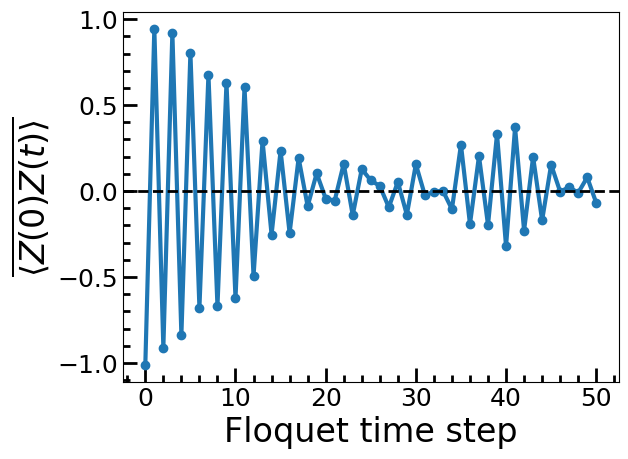

In [34]:
#averaged Autocorrelation
num_cycles = 50 
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot(DTC_sum,linewidth = 3,marker = 'o')
plt.axline((0,0),(num_cycles,0),color='k',linewidth = 2,linestyle='--')
ax.set_ylabel(r'$\overline{ \langle Z(0)Z(t) \rangle}$',fontsize=24)
ax.set_xlabel('Floquet time step',fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_yticks([1.00,0.5,0.0,-0.5,-1.0],minor=True)
ax.minorticks_on()
#ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which='major', length=10, width=2, direction='in',labelsize=18)
ax.tick_params(which='minor', length=5, width=2, direction='in',labelsize=18)

(-0.01, 0.51)

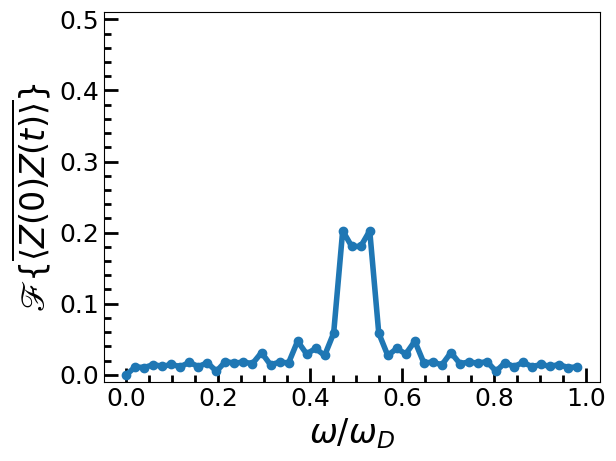

In [35]:
#FFT of autocorrelation
fig = plt.figure()
ax = plt.subplot(1,1,1)
f_s = 51
samplingFrequency   = 1
samplingInterval       = 1 / samplingFrequency
fourierTransform = np.fft.fft(DTC_sum)/len(DTC_sum)
fourierTransform = fourierTransform[range(int(len(DTC_sum)))]
tpCount     = len(DTC_sum)
values      = np.arange(int(tpCount))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod
plt.plot(frequencies, np.abs(fourierTransform),marker='o',linewidth=4)
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(which='major', length=10, width=2, direction='in',labelsize=18)
ax.tick_params(which='minor', length=5, width=2, direction='in',labelsize=18)
ax.set_ylabel(r'$\mathscr{F} \{\overline{ \langle Z(0)Z(t) \rangle} \}$',fontsize=24)
ax.set_xlabel(r'$\omega /\omega_D$',fontsize=24)
plt.ylim([-0.01,0.51])